# 1. Importing The Libraries And Dataset

## 1.1 Import Libraries

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm,model_selection, tree, linear_model, ensemble,neighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## 1.2 Load The Dataset

In [83]:
data=pd.read_csv("Iris.csv")

# 2. Exploring The Data

## 2.1 Top 5 Row's Of The Data

In [84]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2.2 Bottom 5 Row's Of The Data

In [85]:
data.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 2.3 Checking The Datatypes Of Each Column

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## 2.4 Statistical Summary Of The Data

In [87]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2.5 Shape Of The Data

In [88]:
data.shape

(150, 5)

In [89]:
data['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

# 3. Data Visualization and Preprocessing Of The Data

## 3.1 Pairplot

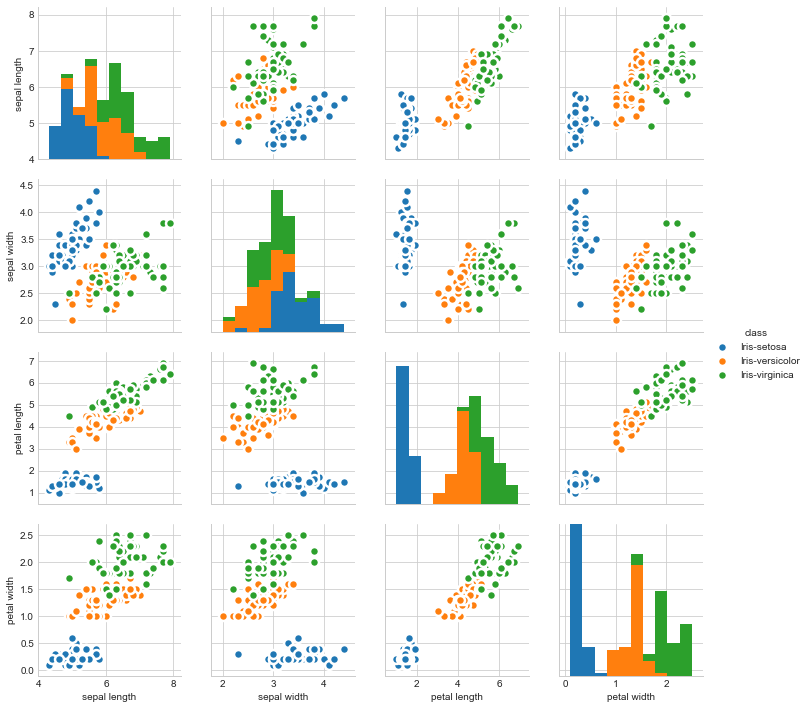

In [90]:
#Looking for relationships between variables across multiple dimensions
sns.pairplot(data, kind="scatter", hue="class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

## 3.2 Boxplot

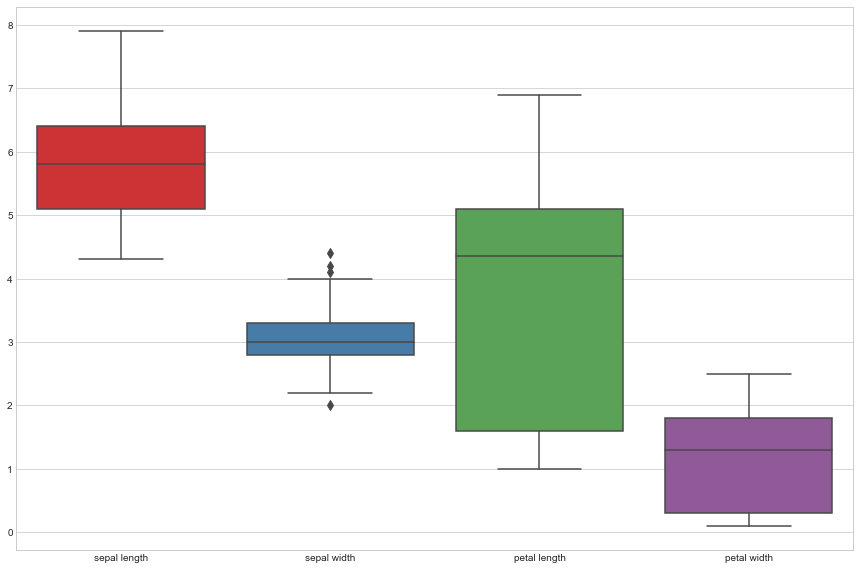

In [91]:
# box and whisker plots
sns.set_style("whitegrid")
plt.subplots(figsize=(15,10))
ax = sns.boxplot(data=data.iloc[:,0:4], orient="v", palette="Set1", fliersize=7)

## 3.3 Distribution of Independent Variables

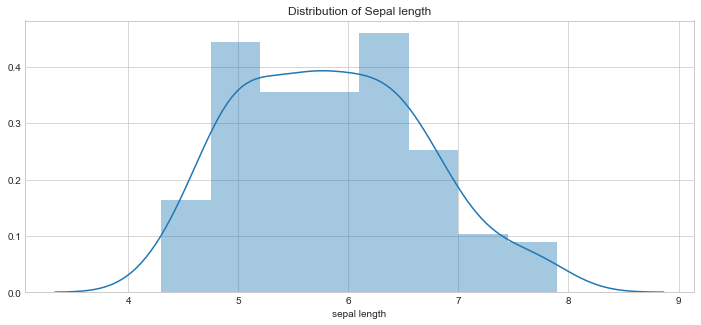

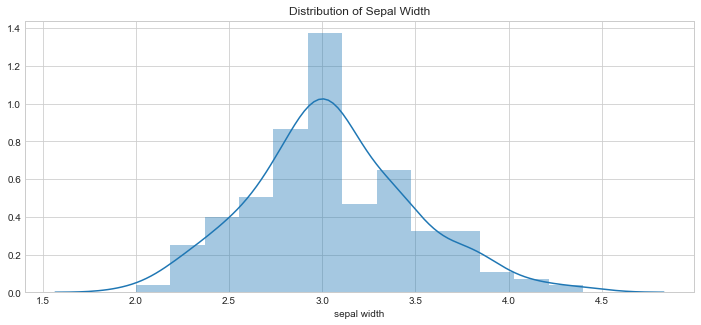

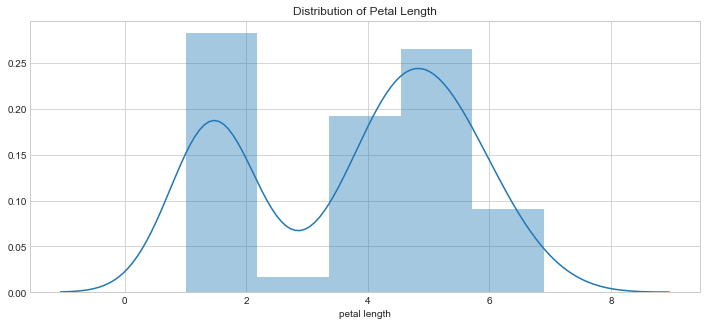

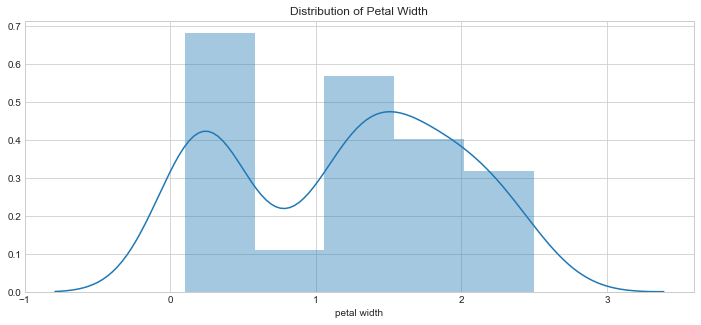

In [92]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Sepal length")
ax = sns.distplot(data['sepal length'])

plt.figure(figsize=(12,5))
plt.title("Distribution of Sepal Width")
ax = sns.distplot(data['sepal width'])


plt.figure(figsize=(12,5))
plt.title("Distribution of Petal Length")
ax = sns.distplot(data['petal length'])


plt.figure(figsize=(12,5))
plt.title("Distribution of Petal Width")
ax = sns.distplot(data['petal width'])

## 3.4 Distribution Of The Target Variable

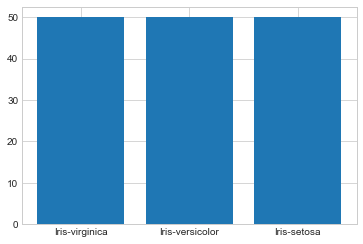

In [93]:
# Exploring the trend of target variable.
height = data['class'].value_counts()
bars = ('Iris-virginica', 'Iris-versicolor', 'Iris-setosa')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

## 3.5 Encoding The Target Variable

In [94]:
# Encoding the target variable into numeric form for the model.
lbl=LabelEncoder()
data["class"] = lbl.fit_transform(data["class"])

# Distribution of the Encoded target variable.
data['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

## 3.6 Correlation Plot

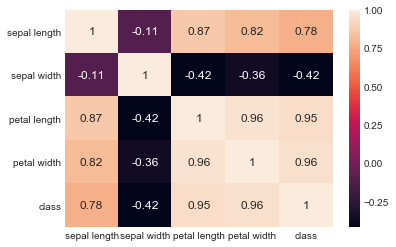

In [95]:
# Checking the Correlation between the Target variable and the Independent variable and Multicolinearity between two
# Independent variables.
sns.heatmap(data.corr(), annot=True,annot_kws={"size": 12})

# 4. Splitting The Data Into Training And Testing Data

### Removing The Unwanted Variable 

In [96]:
# Removing the target variable from the training set.
X=data.drop(['class'],axis=1)

# Assiging the target variable.
y=data['class']

### Train Test Split

In [97]:
#Splitting the loaded dataset into two, 80% of which I have used to train my models and 20% as a validation dataset.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


# Now I have training data in the X_train and y_train for preparing models and a X_test and y_test sets
#that I have used later for validation.Checking the shape of splitted data.
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


# 5. Model Creation

## 5.1 Logistic Regression

In [98]:
# Training and Predicting 
lr=LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
lr_model=lr.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)
print('The accuracy of the logistic regression is {:.2f} out of 1 on training data'.format(lr_model.score(X_train, y_train)))
print('The accuracy of the logistic regression is {:.2f} out of 1 on test data'.format(lr_model.score(X_test, y_test)))

The accuracy of the logistic regression is 0.97 out of 1 on training data
The accuracy of the logistic regression is 1.00 out of 1 on test data


In [99]:
# Model Evalutation
print("Confusion Matrix:\n",confusion_matrix(y_test,lr_pred))
print("Classification Report:\n",classification_report(y_test,lr_pred))
print("Accuracy of Model:",accuracy_score(y_test,lr_pred))
#print(cross_val_score(lr_model,X_train,y_train, cv=10))
print("Average Cross Validatation score:",np.mean(cross_val_score(lr_model,X_train,y_train, cv=10)))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy of Model: 1.0
Average Cross Validatation score: 0.9575757575757574


## 5.2 SVC(Support Vector Classifier)

In [100]:
# Training and Predicting 
svc=SVC(gamma='auto',random_state=1)
svc_model=svc.fit(X_train, y_train)
svc_pred=svc_model.predict(X_test)
print('The accuracy of the support vector classifier is {:.2f} out of 1 on training data'.format(svc_model.score(X_train, y_train)))
print('The accuracy of the support vector classifier is {:.2f} out of 1 on test data'.format(svc_model.score(X_test, y_test)))

The accuracy of the support vector classifier is 0.99 out of 1 on training data
The accuracy of the support vector classifier is 1.00 out of 1 on test data


In [101]:
# Model Evalutation
print("Classification Report:\n",classification_report(y_test,svc_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,svc_pred))
print("Accuracy of the Model:",accuracy_score(y_test,svc_pred))
#print(cross_val_score(svc_model,X_train,y_train, cv=10))
print("Average Cross Validatation score:",np.mean(cross_val_score(svc_model,X_train,y_train, cv=10)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of the Model: 1.0
Average Cross Validatation score: 0.9492424242424242


## 5.3 Random Forest

In [102]:
# Training and Predicting 
rf=RandomForestClassifier(random_state=1,n_estimators=10)
rf_model=rf.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)
print('The accuracy of the random forest is {:.2f} out of 1 on training data'.format(rf_model.score(X_train, y_train)))
print('The accuracy of the random forest is {:.2f} out of 1 on test data'.format(rf_model.score(X_test, y_test)))

The accuracy of the random forest is 0.99 out of 1 on training data
The accuracy of the random forest is 1.00 out of 1 on test data


In [103]:
# Model Evalutation
print("Classification Report:\n", classification_report(y_test,rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,rf_pred))
print("Accuracy of the model:",accuracy_score(y_test,rf_pred))
#print("Cross val score:\n",cross_val_score(rf_model,X_train,y_train,cv=10))
print("Average Cross Validatation score:",np.mean(cross_val_score(rf_model,X_train,y_train,cv=10)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of the model: 1.0
Average Cross Validatation score: 0.9325757575757574


## 5.4 KNN(K-Nearest Neighbors)

In [104]:
# Training and Predicting 
knn = KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(X_train, y_train)
knn_pred=knn_model.predict(X_test)
print('The accuracy of the knn is {:.2f} out of 1 on training data'.format(knn_model.score(X_train, y_train)))
print('The accuracy of the knn is {:.2f} out of 1 on test data'.format(knn_model.score(X_test, y_test)))

The accuracy of the knn is 0.97 out of 1 on training data
The accuracy of the knn is 1.00 out of 1 on test data


In [105]:
# Model Evalutation
print("Classification Report:\n", classification_report(y_test,knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,knn_pred))
print("Accuracy of the model:",accuracy_score(y_test,knn_pred))
#print("Cross val score:\n",cross_val_score(knn_model,X_train,y_train,cv=10))
print("Average Cross Validatation score:",np.mean(cross_val_score(knn_model,X_train,y_train,cv=10)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of the model: 1.0
Average Cross Validatation score: 0.94988344988345


# 6. Performance Comparison

In [106]:
# List of Machine Learning Algorithms(MLA) used:
MLA = [
    #Linear Model
    linear_model.LogisticRegression(),
    
    #Ensemble Methods
    ensemble.RandomForestClassifier(random_state=1,n_estimators=10),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True,random_state=1),
    ]

In [107]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 2)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 2)
    MLA_compare.loc[row_index, 'MLA Cross Val Score'] = round(np.mean(cross_val_score(alg,X_train,y_train,cv=10)),2)
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Cross Val Score
0,LogisticRegression,0.96,1.0,0.95
1,RandomForestClassifier,0.99,1.0,0.93
2,KNeighborsClassifier,0.97,1.0,0.95
3,SVC,0.99,1.0,0.95


### Conclusion : I have used Logestic Regression, Random Forest, KNN and SVC for classifying the flowers among the three species – virginica, setosa, or versicolor based on length and width of petals and sepals. Since all the models are giving a 100% accuracy on the test data i.e(MLA Test Accuracy), out which SVC(Support Vector Classififer) model is giving the best validation score which is 95% accuracy as compared to the other models based on the accuracy of train data. 